# B站：北大TensorFlow笔记（曹）

## 目标1：
搭建神经网络，总结搭建的八股
### TensorFlow中的神经网络

#### 整个计算过程
* 张量表示数据
* 计算图搭建神经网络
* Session执行计算图
* 优化权重（参数）
* 得到模型

In [1]:
#coding:utf-8
import tensorflow as tf
import numpy as np

#### 张量表示数据
1.先用`constant`构建两个常数向量的变量  
2.两个向量做加法，返回值

关于相应的名称
* 乘法：mul
* 除法：truediv
* 加法：add
* 减法：sub
* 取余数：mod

In [3]:
a = tf.constant([1.0, 2.0])
b = tf.constant([3.0, 4.0])
result = a % b
print(result)

Tensor("mod:0", shape=(2,), dtype=float32)


#### 计算图（Graph）搭建神经网路

**能print( )出以下内容的变量都称为计算图，即有加减乘除内容的运算**  
`Tensor("mod:0", shape=(2,), dtype=float32)`

* 计算图参数的解读：  
    * 张量名称`add:0`
        * add->节点名  
        * 0->第0个输出  
    * shape->维度（2,）表示一维数组，长度为2  
    * dtype=float32->数据类型

**图只负责搭建网络，不进行计算**

**矩阵相乘案例**

* 一个中括号内有几个数，就代表有几列数
* 一个中括号内有几个中括号，就代表有几行数

In [15]:
x = tf.constant([[1.0, 2.0]])
w = tf.constant([[3.0], [4.0]])
y = tf.matmul(x, w)
print(y)

Tensor("MatMul_6:0", shape=(1, 1), dtype=float32)


#### 使用会话（Session）进行计算，执行计算图
使用with实现，结构如下
```
with tf.Session() as sess:
    print(sess.run(y))
```

In [5]:
x = tf.constant([[1.0, 2.0]])
w = tf.constant([[3.0], [4.0]])
y = tf.matmul(x, w)
print(y)

with tf.Session() as sess:
    print(sess.run(y))

Tensor("MatMul_1:0", shape=(1, 1), dtype=float32)
[[ 11.]]


#### 优化权重（参数）

**1.首先随机生成参数`tf.Variable()`**  
`w = tf.Variable(tf.random_normal([2,3], stddev=2, mean=0, seed=1))`

* tf.random_normal：生成正态分布的随机数
    * 大小[2,3]
    * 以下没有特殊要求可以不写：
        * stddev：标准差=2
        * mean：均值为0
        * seed：随机种子为1（表示做随机数的序列，固定随机种子，每次生成的随机数保持一致）

**2.关于生成随机数的分布，有以下几种：**  
* tf.random_normal()：正态分布
* tf.truncated_normal()：去掉过大偏离点的正态分布（如果随机出的数据超出平均值两个标准差，则会被去掉）
* tf.random_uniform()：平均分布

**3.生成数组常量**
* tf.zeros，生成全0数组，`tf.zeros([3,2],int32)`，生成三行两列全0矩阵
* tf.ones，生成全1数组，`tf.ones([3,2],int32)`，生成三行两列全1矩阵
* tf.fill，生成全定值数组，`tf.fill([3,2],6)`，生成三行两列全6矩阵
* tf.constant，根据给定的数值生成数组（前面用到过）

In [6]:
q = tf.zeros([3,2], tf.int32)
q = tf.ones([3,2], tf.int32)
q = tf.fill([3,2], 6)

with tf.Session() as sess:
    print(sess.run(q))

[[6 6]
 [6 6]
 [6 6]]


### 神经网络的实现

**整个过程：**

* 训练模型  
1.准备数据集，提取特征，作为输入喂给NN  
2.从输入到输出，搭建NN结构（前向传播）：先搭建计算图，再执行会话  
3.将特征数据喂给NN，迭代优化NN权值参数（反向传播） 


* 使用模型  
4.将训练好的模型进行预测和分类  

### 构建前向传播

#### 变量初始化
* 1.定义变量初值（搭建框架）
初始化所有变量的函数，简写为初始化节点`init_op`
```
x = tf.constant([[0.7, 0.5]])
w1 = tf.Variable(tf.random_normal([2, 3],stddev=1, seed=1))
w2 = tf.Variable(tf.random_normal([3, 1],stddev=1, seed=1))
```
* 2.执行初始化（赋予变量初值）
```
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
```

#### 张量乘法
* 1.定义张量之间的关系（搭建框架）
```
a = tf.matmul(x, w1)
y = tf.matmul(a, w2)
```
* 2.执行乘法
```
with tf.Session() as sess:
    print("y is:\n", sess.run(y))
```


#### Other Points
1.参数矩阵的具体形状  
* 本层指的是计算层（W1是指第一个计算层，W2指的是第二层，因此不包含输入层）  
* (上层节点个数, 本层节点个数）

2.当前为什么没有用到激活函数和偏置值b？

In [14]:
# coding:utf-8
# 两层全连接神经网络demo

# 1.定义输入、随机正态分布初始化权重参数的初值
# 定义一个固定输入，使用tf.constant
x = tf.constant([[0.7, 0.5]])
w1 = tf.Variable(tf.random_normal([2, 3],stddev=1, seed=1))
w2 = tf.Variable(tf.random_normal([3, 1],stddev=1, seed=1))

# 2.定义前向传播过程中变量之间的关系（相乘）
a = tf.matmul(x, w1)
y = tf.matmul(a, w2)

# 3.使用Session计算结果
with tf.Session() as sess:
    # 01.初始化变量
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    # 02.进行NN计算，并且输出结果
    print("y is:\n", sess.run(y))

y is:
 [[ 3.0904665]]


### 构建反向传播

#### 喂数据
先用`tf.placeholder`进行占位，shape=(数据组数, 数据维度)，告诉`sess.run(y)`要输入多少个数据

* 喂一组数据，数据有两个特征：
先占一个位置的数据，然后输入数据
```
x = tf.placeholder(tf.float32,shape=(1, 2))
sess.run(y, feed_dict={x:[[0.5, 0.6]]})
```

* 喂多组数据，数据同样是有两维特征：
数据个数填写None，代表无数个数据/未知
```
x = tf.placeholder(tf.float32,shape=(None, 2))
sess.run(y, feed_dict={x:[[0.1,0.2], [0.2,0.3], [0.3,0.4], [0.4,0.5]]})
```

##### 向NN喂入一组特征

In [20]:
# coding:utf-8
# 两层全连接神经网络demo

# 1.定义输入、随机正态分布初始化权重参数的初值
# 定义一个输入，使用tf.placeholder()
x = tf.placeholder(tf.float32, shape=(1, 2))
w1 = tf.Variable(tf.random_normal([2, 3],stddev=1, seed=1))
w2 = tf.Variable(tf.random_normal([3, 1],stddev=1, seed=1))

# 2.定义前向传播过程中变量之间的关系（相乘）
a = tf.matmul(x, w1)
y = tf.matmul(a, w2)

# 3.使用Session计算结果
with tf.Session() as sess:
    # 01.初始化变量
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    # 02.使用feed_dict喂入参数，进行NN计算，并且输出结果
    print("y is:\n", sess.run(y, feed_dict={x: [[0.7, 0.5]]}))

y is:
 [[ 3.0904665]]


##### 向NN喂入多组特征

In [21]:
# coding:utf-8
# 两层全连接神经网络demo

# 1.定义输入、随机正态分布初始化权重参数的初值
# 定义多个输入，使用tf.placeholder()
x = tf.placeholder(tf.float32, shape=(None, 2))
w1 = tf.Variable(tf.random_normal([2, 3],stddev=1, seed=1))
w2 = tf.Variable(tf.random_normal([3, 1],stddev=1, seed=1))

# 2.定义前向传播过程中变量之间的关系（相乘）
a = tf.matmul(x, w1)
y = tf.matmul(a, w2)

# 3.使用Session计算结果
with tf.Session() as sess:
    # 01.初始化变量
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    # 02.使用feed_dict喂入参数，进行NN计算，并且输出结果
    print("y is:\n", sess.run(y, feed_dict={x: [[0.7, 0.5], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]}))
    print("w1:\n", sess.run(w1))
    print("w2:\n", sess.run(w2))

y is:
 [[ 3.0904665 ]
 [ 1.2236414 ]
 [ 1.72707319]
 [ 2.23050475]]
w1:
 [[-0.81131822  1.48459876  0.06532937]
 [-2.4427042   0.0992484   0.59122431]]
w2:
 [[-0.81131822]
 [ 1.48459876]
 [ 0.06532937]]


#### 损失函数
常见的损失函数
* MSE均方误差
即为预测值与真实值差的平方，除以样本个数n  
`loss = tf.reduce_mean(tf.square(y_-y))`

#### 反向传播训练
目标：减小loss数值  
常见方法：
* 梯度下降  
`train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)`
* Momentum优化  
`train_step = tf.train.MomentumOptimizer(learining_rate, momentum).minimize(loss)`
* Adam  
`train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)`

其中，学习率learning_rate代表参数每次更新的幅度

**代码案例如下：需要背下来**

In [1]:
#coding:utf-8
import tensorflow as tf
import numpy as np

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


* 1.生成数据集

In [2]:
# batch_size：一次喂给神经网络多少数据（此数值不可以过大，否则会吃不消）
BATCH_SIZE = 8
seed = 23455

# 基于随机种子23455生成数据集
rng = np.random.RandomState(seed)
# 生成32行数据，每组数据都有 体积和重量 两个属性作为特征
X = rng.rand(32,2)
Y = [[int(x0 + x1 < 1)] for (x0, x1) in X]

print("X:\n",X)
print("Y:\n",Y)

X:
 [[0.83494319 0.11482951]
 [0.66899751 0.46594987]
 [0.60181666 0.58838408]
 [0.31836656 0.20502072]
 [0.87043944 0.02679395]
 [0.41539811 0.43938369]
 [0.68635684 0.24833404]
 [0.97315228 0.68541849]
 [0.03081617 0.89479913]
 [0.24665715 0.28584862]
 [0.31375667 0.47718349]
 [0.56689254 0.77079148]
 [0.7321604  0.35828963]
 [0.15724842 0.94294584]
 [0.34933722 0.84634483]
 [0.50304053 0.81299619]
 [0.23869886 0.9895604 ]
 [0.4636501  0.32531094]
 [0.36510487 0.97365522]
 [0.73350238 0.83833013]
 [0.61810158 0.12580353]
 [0.59274817 0.18779828]
 [0.87150299 0.34679501]
 [0.25883219 0.50002932]
 [0.75690948 0.83429824]
 [0.29316649 0.05646578]
 [0.10409134 0.88235166]
 [0.06727785 0.57784761]
 [0.38492705 0.48384792]
 [0.69234428 0.19687348]
 [0.42783492 0.73416985]
 [0.09696069 0.04883936]]
Y:
 [[1], [0], [0], [1], [1], [1], [1], [0], [1], [1], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [1], [0], [1], [0], [1], [1], [1], [1], [1], [0], [1]]


* 2.搭建NN的输入、输出、参数
* 3.搭建NN的前向传播过程

In [3]:
# 搭建NN的输入、输出、参数（其中y是矩阵计算后的值，而y_是从矩阵Y中取出来的标签
x = tf.placeholder(tf.float32, shape=(None, 2))
y_= tf.placeholder(tf.float32, shape=(None, 1))

w1 = tf.Variable(tf.random_normal([2, 3], stddev=1, seed=1))
w2 = tf.Variable(tf.random_normal([3, 1], stddev=1, seed=1))

# 搭建NN的前向传播过程
a = tf.matmul(x, w1)
y = tf.matmul(a, w2)

* 4.反向传播，指定损失函数loss

In [4]:
# 均方误差计算损失
loss = tf.reduce_mean(tf.square(y-y_))

# 梯度下降开始学习，学习率0.001
# train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

train_step = tf.train.MomentumOptimizer(0.001, 0.9).minimize(loss)
# train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

#### 生成Session，训练steps轮
思想：
* 分批循环喂入数据，运行train_step进行梯度下降优化 `sess.run(train_step)`
* 每500轮，整体喂入数据，运行total_loss计算损失loss `sess.run(loss)`

In [6]:
with tf.Session() as sess:
    # 初始化变量
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    # 输出训练前的权重
    print("w1:\n", sess.run(w1))
    print("w2:\n", sess.run(w2))
    print("\n")
    
    # 训练模型
    STEPS = 12001
    for i in range(STEPS):
        start = (i*BATCH_SIZE) % 32
        end = start + BATCH_SIZE
        # 分批喂入训练数据，进行权重的学习（梯度下降法）
        sess.run(train_step, feed_dict={x:X[start:end], y_:Y[start:end]})
#         print("train_step\n",train_step)
        
        # 输出训练后的权值参数
#         print("\n")
#         print("w1:\n",sess.run(w1))
#         print("w2:\n",sess.run(w2))
        
        # 每500次计算一次均方误差
        if i % 500 == 0:
            total_loss = sess.run(loss, feed_dict={x:X, y_:Y})
            print("After %d training steps, loss_mse on all data is %g" % (i+1, total_loss))

w1:
 [[-0.8113182   1.4845988   0.06532937]
 [-2.4427042   0.0992484   0.5912243 ]]
w2:
 [[-0.8113182 ]
 [ 1.4845988 ]
 [ 0.06532937]]


After 1 training steps, loss_mse on all data is 5.13118
After 501 training steps, loss_mse on all data is 0.384391
After 1001 training steps, loss_mse on all data is 0.383592
After 1501 training steps, loss_mse on all data is 0.383562
After 2001 training steps, loss_mse on all data is 0.383561
After 2501 training steps, loss_mse on all data is 0.383561
After 3001 training steps, loss_mse on all data is 0.383561
After 3501 training steps, loss_mse on all data is 0.383561
After 4001 training steps, loss_mse on all data is 0.383561
After 4501 training steps, loss_mse on all data is 0.383561
After 5001 training steps, loss_mse on all data is 0.383561
After 5501 training steps, loss_mse on all data is 0.383561
After 6001 training steps, loss_mse on all data is 0.383561
After 6501 training steps, loss_mse on all data is 0.383561
After 7001 training steps, l

## 目标2：优化神经网络

### 损失函数 loss
* 目标：使得损失loss最小
* 常见方法：
    * 均方误差MSE(Mean Squared Error)  
    `loss_mse = tf.reduce_mean(tf.square(y_-y))`
    * 自定义损失函数
    * 交叉熵CE(Cross Entropy)
    
#### 均方误差MSE案例
例：建模牛奶的销量，以预测牛奶的产量  
本案例只有一个输出层，即单层神经网络  
本案例中，默认预测多了与预测少了损失相同。（但是实际情况，预测多了损失成本，预测少了损失利润）  
预期生成的应该是X1+X2，实际生成的是0.98X1+1.02X2，说明预测酸奶日销量的函数拟合正确

In [12]:
#coding:utf-8
# 导入模块
import tensorflow as tf
import numpy as np

# 生成数据集
BATCH_SIZE = 8
SEED = 23455
rdm = np.random.RandomState(SEED)
X = rdm.rand(32,2)
# 这里数据加入了噪声: -0.05 ~ +0.05
Y_ = [[x1+x2+(rdm.rand()/10.0-0.05)] for (x1, x2) in X]


# 定义神经网络输入、输出、权重，定义前向传播过程
x = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))
w1 = tf.Variable(tf.random_normal([2,1], stddev=1, seed=1))
y = tf.matmul(x,w1)

# 定义损失函数MSE & 反向传播（方法为梯度下降法）
loss_mse = tf.reduce_mean(tf.square(y_-y))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss_mse)
# train_step = tf.train.MomentumOptimizer(0.001, 0.9).minimize(loss_mse)
# train_step = tf.train.AdamOptimizer(0.001).minimize(loss_mse)

# 生成Session，启动训练，进行STEPS轮
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    STEPS = 20000
    for i in range(STEPS):
        start = (i*BATCH_SIZE) % 32
        end = start + BATCH_SIZE
        sess.run(train_step, feed_dict={x: X[start:end], y_:Y_[start:end]})
        if i % 500 == 0:
            print("After %d training steps, w1 is: " % (i+1))
            print(sess.run(w1),"\n")
    
    print("Final w1 is: \n", sess.run(w1))

After 1 training steps, w1 is: 
[[-0.80974597]
 [ 1.48529029]] 

After 501 training steps, w1 is: 
[[-0.46074435]
 [ 1.64187801]] 

After 1001 training steps, w1 is: 
[[-0.21939856]
 [ 1.69847655]] 

After 1501 training steps, w1 is: 
[[-0.04415595]
 [ 1.70031762]] 

After 2001 training steps, w1 is: 
[[ 0.08942621]
 [ 1.67332804]] 

After 2501 training steps, w1 is: 
[[ 0.19583553]
 [ 1.63226771]] 

After 3001 training steps, w1 is: 
[[ 0.28375748]
 [ 1.58544338]] 

After 3501 training steps, w1 is: 
[[ 0.35848638]
 [ 1.53744709]] 

After 4001 training steps, w1 is: 
[[ 0.42332521]
 [ 1.49073923]] 

After 4501 training steps, w1 is: 
[[ 0.48040032]
 [ 1.44655728]] 

After 5001 training steps, w1 is: 
[[ 0.5311361 ]
 [ 1.40545344]] 

After 5501 training steps, w1 is: 
[[ 0.57653254]
 [ 1.367594  ]] 

After 6001 training steps, w1 is: 
[[ 0.6173259 ]
 [ 1.33294022]] 

After 6501 training steps, w1 is: 
[[ 0.65408474]
 [ 1.30134249]] 

After 7001 training steps, w1 is: 
[[ 0.68726856]
 [

#### 自定义损失案例

考虑成本和损失不相同，使用**自定义损失函数**来计算

制定分段函数：
预测多了，损失成本；预测少了，损失利润（单件成本1元，利润9元），因此生产越多越好（如果利润是1，成本是9，那么NN会朝着尽量少生产的方向走）  

使用`greater()`函数判断两个变量的大小，最后将损失求和  
`loss = tf.reduce_sum(tf.where(tf.greater(y,y_)，COST(y-y_), PROFIT(y_-y)))`  

In [7]:
#coding:utf-8
# 导入模块
import tensorflow as tf
import numpy as np

# 生成数据集
BATCH_SIZE = 8
SEED = 23455
COST = 1
PROFIT = 9

rdm = np.random.RandomState(SEED)
X = rdm.rand(32,2)
# 这里虽数据加入了噪声: -0.05 ~ +0.05
Y_ = [[x1+x2+(rdm.rand()/10.0-0.05)] for (x1, x2) in X]


# 定义神经网络输入、输出、权重，定义前向传播过程
x = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))
w1 = tf.Variable(tf.random_normal([2,1], stddev=1, seed=1))
y = tf.matmul(x,w1)

# 自定义损失函数 & 反向传播（方法为梯度下降法）
loss_mse = tf.reduce_sum(tf.where(tf.greater(y, y_), (y - y_)*COST, (y_ - y)*PROFIT))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss_mse)
# train_step = tf.train.MomentumOptimizer(0.001, 0.9).minimize(loss_mse)
# train_step = tf.train.AdamOptimizer(0.001).minimize(loss_mse)

# 生成Session，启动训练，进行STEPS轮
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    STEPS = 20000
    for i in range(STEPS):
        start = (i*BATCH_SIZE) % 32
        end = start + BATCH_SIZE
        sess.run(train_step, feed_dict={x: X[start:end], y_:Y_[start:end]})
        
        if i % 500 == 0:
            print("After %d training steps, w1 is: " % (i+1))
            print(sess.run(w1),"\n")
            
    print("Final w1 is: \n", sess.run(w1))
    

After 1 training steps, w1 is: 
[[-0.762993 ]
 [ 1.5095658]] 

After 501 training steps, w1 is: 
[[1.0235443]
 [1.0463371]] 

After 1001 training steps, w1 is: 
[[1.0174844]
 [1.0406414]] 

After 1501 training steps, w1 is: 
[[1.0211805]
 [1.0472372]] 

After 2001 training steps, w1 is: 
[[1.0179386]
 [1.041272 ]] 

After 2501 training steps, w1 is: 
[[1.0205938]
 [1.0390443]] 

After 3001 training steps, w1 is: 
[[1.0242898]
 [1.04564  ]] 

After 3501 training steps, w1 is: 
[[1.01823  ]
 [1.0399443]] 

After 4001 training steps, w1 is: 
[[1.021926]
 [1.04654 ]] 

After 4501 training steps, w1 is: 
[[1.0245812]
 [1.0443122]] 

After 5001 training steps, w1 is: 
[[1.0195622]
 [1.04744  ]] 

After 5501 training steps, w1 is: 
[[1.0222174]
 [1.0452123]] 

After 6001 training steps, w1 is: 
[[1.0161575]
 [1.0395166]] 

After 6501 training steps, w1 is: 
[[1.0198536]
 [1.0461123]] 

After 7001 training steps, w1 is: 
[[1.0169773]
 [1.0424668]] 

After 7501 training steps, w1 is: 
[[1.01748

#### 交叉熵CE案例
交叉熵：表征两个概率分布的距离（交叉熵越大，两个概率分布越远，交叉熵越小，两个概率分布越近）

工程中不会用到以下函数：
`ce = -tf.reduce_mean(y_*tf.log(tf.clip_by_value(y, 1e-12, 1.0)))`

![](https://raw.githubusercontent.com/king0682/FigureBed/master/img/20190718225630.png)

**softmax函数目的：**  
1.为了让前向传播的结果y满足概率分布，让n分类的n个输出，每个都在[0,1]之间  
2.且n个输出之和为1  

![](https://raw.githubusercontent.com/king0682/FigureBed/master/img/20190718230434.png)

**实际操作：**

1.输出经过softmax函数，使其满足概率分布  
2.将输出结果与标准答案求交叉熵  

工程中用到以下两句函数(cem是损失函数，在后面手写数字识别会用)：
```
ce = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y, labels=tf.argmax(y_, 1))
cem = tf.reduce_mean(ce)
```

### 学习率 learning rate
![](https://raw.githubusercontent.com/king0682/FigureBed/master/img/20190718231738.png)

**案例：**  
损失函数loss = (w+1)^2, w初值为5，反向传播找最优w，即对应loss最小的w值

In [15]:
#coding:utf-8
import tensorflow as tf

# 定义待优化参数w初值为5
w = tf.Variable(tf.constant(5, dtype = tf.float32))

# 定义损失函数loss
loss = tf.square(w+1)

# 定义反向传播
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

# 生成Session，进行40轮训练
with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    for i in range(40):
        sess.run(train_step)
        w_val = sess.run(w)
        loss_val = sess.run(loss)
        print(("After %s steps: w is %f, loss is %f.") % (i, w_val, loss_val))

After 0 steps: w is 2.600000, loss is 12.959999.
After 1 steps: w is 1.160000, loss is 4.665599.
After 2 steps: w is 0.296000, loss is 1.679616.
After 3 steps: w is -0.222400, loss is 0.604662.
After 4 steps: w is -0.533440, loss is 0.217678.
After 5 steps: w is -0.720064, loss is 0.078364.
After 6 steps: w is -0.832038, loss is 0.028211.
After 7 steps: w is -0.899223, loss is 0.010156.
After 8 steps: w is -0.939534, loss is 0.003656.
After 9 steps: w is -0.963720, loss is 0.001316.
After 10 steps: w is -0.978232, loss is 0.000474.
After 11 steps: w is -0.986939, loss is 0.000171.
After 12 steps: w is -0.992164, loss is 0.000061.
After 13 steps: w is -0.995298, loss is 0.000022.
After 14 steps: w is -0.997179, loss is 0.000008.
After 15 steps: w is -0.998307, loss is 0.000003.
After 16 steps: w is -0.998984, loss is 0.000001.
After 17 steps: w is -0.999391, loss is 0.000000.
After 18 steps: w is -0.999634, loss is 0.000000.
After 19 steps: w is -0.999781, loss is 0.000000.
After 20 ste

学习率设置多少合适？  
使用指数衰减学习率，可以根据BATCH_SIZE的轮数动态更新学习率  
![](https://raw.githubusercontent.com/king0682/FigureBed/master/img/20190718233645.png)

In [8]:
#coding:utf-8
import tensorflow as tf

LEARNING_RATE_BASE = 0.1 # 最初学习率
LEARNING_RATE_DECAY = 0.99 # 学习率衰减率
LEARNING_RATE_STEP = 1 # 每多少轮执行衰减一次学习率（一共32组数据，每批喂入8个，所以每4轮更新一次学习率）

##### 指数衰减学习率模块 #####
# 整体循环轮数计数器，初值为0，该变量设置为不可训练
global_step = tf.Variable(0, trainable = False)
# 定义指数下降学习率,staircase代表是否断崖式下降：当为true时，LEARNING_RATE_STEP取整数，lr阶梯型衰减，当为false，lr为平滑下降的曲线
learning_rate = tf.train.exponential_decay(LEARNING_RATE_BASE, global_step, LEARNING_RATE_STEP, LEARNING_RATE_DECAY, staircase=True)

# 定义待优化参数w。初值为10
w = tf.Variable(tf.constant(10, dtype = tf.float32))

# 定义损失函数
loss = tf.square(w+1)

# 定义反向传播
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

# 生成Session，训练40轮
with  tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    for i in range(100):
        sess.run(train_step)
        learning_rate_val = sess.run(learning_rate)
        global_step_val = sess.run(global_step)
        w_val = sess.run(w)
        loss_val = sess.run(loss)
        print("After %s steps: global_step is %f, learning rate is %f, loss is %f" % (i, global_step_val, learning_rate_val, loss_val))
        

After 0 steps: global_step is 1.000000, learning rate is 0.099000, loss is 77.440002
After 1 steps: global_step is 2.000000, learning rate is 0.098010, loss is 49.809719
After 2 steps: global_step is 3.000000, learning rate is 0.097030, loss is 32.196194
After 3 steps: global_step is 4.000000, learning rate is 0.096060, loss is 20.912704
After 4 steps: global_step is 5.000000, learning rate is 0.095099, loss is 13.649122
After 5 steps: global_step is 6.000000, learning rate is 0.094148, loss is 8.950810
After 6 steps: global_step is 7.000000, learning rate is 0.093207, loss is 5.897361
After 7 steps: global_step is 8.000000, learning rate is 0.092274, loss is 3.903603
After 8 steps: global_step is 9.000000, learning rate is 0.091352, loss is 2.595741
After 9 steps: global_step is 10.000000, learning rate is 0.090438, loss is 1.733887
After 10 steps: global_step is 11.000000, learning rate is 0.089534, loss is 1.163374
After 11 steps: global_step is 12.000000, learning rate is 0.088638,

In [19]:
# 测试学习率的下降效果

for i in range(100):
    decay = 0.99 ** (i/4)
    lr = 0.1*decay
#     print(decay)
#     print(lr)

### 滑动平均 ema

![](https://raw.githubusercontent.com/king0682/FigureBed/master/img/20190720152259.png)

目的：为参数变化增加了影子（滑动平均值），当参数发生了变化，影子值缓慢跟随（滑动平均值），增加了模型的泛化能力

其中，滑动平均衰减率`MOVING_AVERAGE_DECAY`是一个超参数

![](https://raw.githubusercontent.com/king0682/FigureBed/master/img/20190720153132.png)

In [1]:
# 源码作用：不断更新和优化w1参数，滑动平均做w1的影子
#coding:utf-8
import tensorflow as tf

# 0.基本参数，训练轮数（该参数不可以训练）
global_step = tf.Variable(0, trainable=False)

# 1.定义权重w1和滑动平均
# 1.1定义参数w1 
w1 = tf.Variable(0, dtype=tf.float32)
w2 = tf.Variable(5, dtype=tf.float32)

# 1.2 定义滑动平均类ema（衰减率为0.99），使用指数滑动平均
MOVING_AVERAGE_DECAY = 0.99
ema = tf.train.ExponentialMovingAverage(MOVING_AVERAGE_DECAY, global_step)

## ema.apply()更新w1参数，更新一个参数
# ema_op = ema.apply([w1])

# tf.trainable_variable()会将所有待训练的参数汇总为List，针对可训练的tf.Variable(a)变量有效，更新所有可训练的参数。
# ema_op定义了对于待训练参数求滑动平均的过程，称为滑动平均节点（），滑动平均实例ema_op
ema_op = ema.apply(tf.trainable_variables())

with tf.Session() as sess:
    # 初始化变量
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    # 应该以list的形式输入sess.run()、ema.apply()
    
    # 显示w1和w1的滑动平均值（起始值两者应该均为0），求多个权值，则都写在list括号中即可
    print(sess.run([w1, ema.average(w1), w2, ema.average(w2)]))
    # 运行多个节点，则
#     print(sess.run(ema.average([w1,w2])))

    # Case1：将参数w1赋值为1，执行滑动平均节点，显示w1和w1的滑动平均值
    sess.run(tf.assign(w1, 1))
    sess.run(ema_op)
    print(sess.run([w1, ema.average(w1)]))
    
    # Case2：将global_step更新为100，w1初值更新为10
    sess.run(tf.assign(global_step, 100))
    sess.run(tf.assign(w1, 10))
    sess.run(ema_op)
    print(sess.run([w1, ema.average(w1)]))
    
    # 接下来每执行一次sess.run(ema)，都会更新一次滑动平均值，使其逐渐靠近w1
    sess.run(ema_op)
    print("second time:\n",sess.run([w1, ema.average(w1)]))
    
    sess.run(ema_op)
    print("third time:\n",sess.run([w1, ema.average(w1)]))

    sess.run(ema_op)
    print("fourth time:\n",sess.run([w1, ema.average(w1)]))
    
    sess.run(ema_op)
    print("fifth time:\n",sess.run([w1, ema.average(w1)]))

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[0.0, 0.0, 5.0, 5.0]
[1.0, 0.9]
[10.0, 1.6445453]
second time:
 [10.0, 2.3281732]
third time:
 [10.0, 2.955868]
fourth time:
 [10.0, 3.532206]
fifth time:
 [10.0, 4.061389]


### 正则化 regularization
* 面对情况：模型在训练集正确率高，但是对测试集的正确率不高（出现过拟合现象）。正则化方法可以缓解过拟合，损失函数中引入模型复杂度指标，给每个w加上权重，抑制训练数据噪声，防止模型对噪声进行拟合。
* **为什么这么做：**  
当模型出现过拟合情况时，往往是模型对于**数据特征选取过多**导致的，此时拟合出来的函数会竭尽全力拟合数据，出现泛化性差的情况，此时减少特征 / 给特征赋予权重，会增强模型的泛化能力。  
1.减少参数w的数量  
2.减少参数w的数值大小  

* 包含正则化的损失函数，不包含正则化的损失函数


In [ ]:
# import numpy
# import tensorflow as tf
# with tf.device('/gpu:0'):
#         a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
#         b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
#         c = tf.matmul(a, b)
#         sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
#         print(sess.run(c))

In [10]:
# # xx在(-3,3)之间步长为0.01，yy在(-3,3)之间步长为0.01，生成二维网格点
# xx, yy = np.mgrid[-3:3:0.01, -3:3:0.01]
# print(xx)
# print(yy)
# # 将xx, yy 拉直，合并成一个两列的矩阵，得到一个网格坐标点集合
# grid = np.c_[xx.ravel(), yy.ravel()]
# print(grid)

#### 案例：对一个正态分布的圆用一个函数进行区分

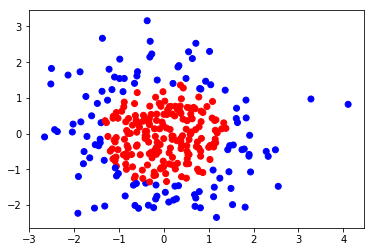

After 0 steps, loss is: 4.886498


KeyboardInterrupt: 

In [10]:
#coding:utf-8
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# import os
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# with tf.Session() as sess:
#     sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

##### 数据准备与生成 #####

BATCH_SIZE = 30
seed = 2

# 基于seed产生随机数，生成300*2的矩阵，坐标平方和小于2记Y为1，否则为0
rdm = np.random.RandomState(seed)
X = rdm.randn(300,2)
Y_ = [int(x0*x0 + x1*x1 < 2) for (x0,x1) in X]
# Y中元素，如果为1赋值为red，如果为0赋值为blue
Y_c = [['red' if y else 'blue'] for y in Y_]
# 重新整理数据，不知道整理X有什么用，好像没有什么变化，Y变成了ndarry的格式
X = np.vstack(X).reshape(-1,2)
Y_ = np.vstack(Y_).reshape(-1,1)
# print(X)
# print(Y_)
# print(Y_c)

# 使用plt.scatter画图，用各行的Y_c对应颜色
plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c))
plt.show()

##### 定义神经网络 #####
def get_weight(shape, regularizer):
    w = tf.Variable(tf.random_normal(shape), dtype = tf.float32)
    tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(regularizer)(w))
    return w
    
def get_bias(shape):
    b = tf.Variable(tf.constant(0.01, shape = shape))
    return b

x = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))

w1 = get_weight([2,11], 0.01)
b1 = get_bias([11])
y1 = tf.nn.relu(tf.matmul(x, w1)+b1)

w2 = get_weight([11,1], 0.01)
b2 = get_bias([1])
# 输出层不经过激活函数
y = tf.matmul(y1, w2)+b2

##### 定义损失函数 #####
loss_mse = tf.reduce_mean(tf.square(y-y_))
loss_total = loss_mse + tf.add_n(tf.get_collection('losses'))

##### 定义反向传播方法：不含正则化 #####
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_mse)

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    
    STEPS = 40000
    for i in range(STEPS):
        start = (i*BATCH_SIZE) % 300
        end = start + BATCH_SIZE
        sess.run(train_step, feed_dict = {x:X[start:end], y_:Y_[start:end]})
        if i % 2000 == 0:
            loss_mse_v = sess.run(loss_mse, feed_dict = {x:X, y_:Y_})
            print("After %d steps, loss is: %f" % (i, loss_mse_v))
            
        # xx在(-3,3)之间步长为0.01，yy在(-3,3)之间步长为0.01，生成二维网格点
        xx, yy = np.mgrid[-3:3:0.01, -3:3:0.01]
        
        # 将xx, yy 拉直，合并成一个两列的矩阵，得到一个网格坐标点集合
        grid = np.c_[xx.ravel(), yy.ravel()]
        
        # 将每个点坐标喂入神经网络，probs为输出（实际上就是输出y的结果）
        probs = sess.run(y, feed_dict={x:grid})
        
#         # 查看probs的数值
#         print("This is the probs", probs)
        
#         # 查看probs的形状
#         print("The probs shape is:", sess.run(tf.shape(probs)))
        
        # 将probs的shape调整为xx的样子
        probs = probs.reshape(xx.shape)
        
#         print("w1:\n",sess.run(w1))
#         print("b1:\n",sess.run(b1))
#         print("w2:\n",sess.run(w2))
#         print("b2:\n",sess.run(b2))
        
    plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c))
    # probs为预测“步长为分辨率“的图片各个点应该有的输出，红色为1，蓝色为0，红蓝分界的地方应该是0.5，作为分界线的概率会更大，
    plt.contour(xx,yy,probs,levels=[0.5])
    plt.show()
    

After 0 steps, loss is: 11.798279
After 2000 steps, loss is: 3.987395
After 4000 steps, loss is: 1.743761
After 6000 steps, loss is: 0.775956
After 8000 steps, loss is: 0.438429
After 10000 steps, loss is: 0.325085
After 12000 steps, loss is: 0.268681
After 14000 steps, loss is: 0.235048
After 16000 steps, loss is: 0.210228
After 18000 steps, loss is: 0.190532
After 20000 steps, loss is: 0.174507
After 22000 steps, loss is: 0.161431
After 24000 steps, loss is: 0.150816
After 26000 steps, loss is: 0.142253
After 28000 steps, loss is: 0.135226
After 30000 steps, loss is: 0.129455
After 32000 steps, loss is: 0.124366
After 34000 steps, loss is: 0.119924
After 36000 steps, loss is: 0.116351
After 38000 steps, loss is: 0.113443
w1:
 [[-0.6258114   0.24418978  0.00267789  0.12028689  0.3645584  -0.18414995
  -0.08343404 -0.26734239  0.3854354   0.05091242 -0.70437622]
 [ 0.31224555  0.70877564  0.0147686   0.56469619  0.10231089 -0.28771323
  -0.10983548 -0.03434968 -0.84209675  0.2627241  -

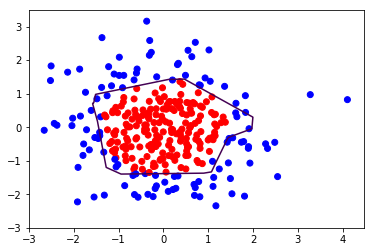

In [20]:
#定义反向传播方法：包含正则化
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_total)

with tf.Session() as sess:
	init_op = tf.global_variables_initializer()
	sess.run(init_op)
    
	STEPS = 40000
	for i in range(STEPS):
		start = (i*BATCH_SIZE) % 300
		end = start + BATCH_SIZE
		sess.run(train_step, feed_dict={x: X[start:end], y_:Y_[start:end]})
        
		if i % 2000 == 0:
			loss_v = sess.run(loss_total, feed_dict={x:X,y_:Y_})
			print("After %d steps, loss is: %f" %(i, loss_v))

	xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
	grid = np.c_[xx.ravel(), yy.ravel()]
	probs = sess.run(y, feed_dict={x:grid})
	probs = probs.reshape(xx.shape)
	print("w1:\n",sess.run(w1))
	print("b1:\n",sess.run(b1))
	print("w2:\n",sess.run(w2))
	print("b2:\n",sess.run(b2))

plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c)) 
plt.contour(xx, yy, probs, levels=[0.5])
plt.show()

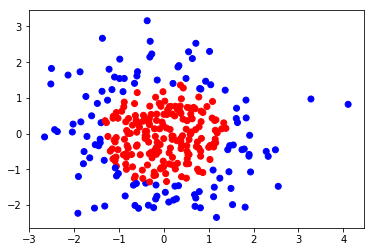

After 0 steps, loss is: 14.883932
After 2000 steps, loss is: 3.468926
After 4000 steps, loss is: 0.822651
After 6000 steps, loss is: 0.181809
After 8000 steps, loss is: 0.102895
After 10000 steps, loss is: 0.082213
After 12000 steps, loss is: 0.075859
After 14000 steps, loss is: 0.074313
After 16000 steps, loss is: 0.073640
After 18000 steps, loss is: 0.073142
After 20000 steps, loss is: 0.072790
After 22000 steps, loss is: 0.072427
After 24000 steps, loss is: 0.072226
After 26000 steps, loss is: 0.072036
After 28000 steps, loss is: 0.071890
After 30000 steps, loss is: 0.071706
After 32000 steps, loss is: 0.071595
After 34000 steps, loss is: 0.071368
After 36000 steps, loss is: 0.071168
After 38000 steps, loss is: 0.071018


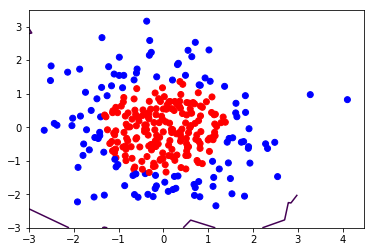

In [39]:
#coding:utf-8
#0导入模块 ，生成模拟数据集
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
BATCH_SIZE = 30 
seed = 2 
#基于seed产生随机数
rdm = np.random.RandomState(seed)
#随机数返回300行2列的矩阵，表示300组坐标点（x0,x1）作为输入数据集
X = rdm.randn(300,2)
#从X这个300行2列的矩阵中取出一行,判断如果两个坐标的平方和小于2，给Y赋值1，其余赋值0
#作为输入数据集的标签（正确答案）
Y_ = [int(x0*x0 + x1*x1 <2) for (x0,x1) in X]
#遍历Y中的每个元素，1赋值'red'其余赋值'blue'，这样可视化显示时人可以直观区分
Y_c = [['red' if y else 'blue'] for y in Y_]
#对数据集X和标签Y进行shape整理，第一个元素为-1表示，随第二个参数计算得到，第二个元素表示多少列，把X整理为n行2列，把Y整理为n行1列
X = np.vstack(X).reshape(-1,2)
Y_ = np.vstack(Y_).reshape(-1,1)
# print(X)
# print(Y_)
# print(Y_c)
#用plt.scatter画出数据集X各行中第0列元素和第1列元素的点即各行的（x0，x1），用各行Y_c对应的值表示颜色（c是color的缩写） 
plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c)) 
plt.show()


#定义神经网络的输入、参数和输出，定义前向传播过程 
def get_weight(shape, regularizer):
	w = tf.Variable(tf.random_normal(shape), dtype=tf.float32)
	tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(regularizer)(w))
	return w

def get_bias(shape):  
    b = tf.Variable(tf.constant(0.01, shape=shape)) 
    return b
	
x = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))

w1 = get_weight([2,11], 0.01)	
b1 = get_bias([11])
y1 = tf.nn.relu(tf.matmul(x, w1)+b1)

w2 = get_weight([11,1], 0.01)
b2 = get_bias([1])
y = tf.matmul(y1, w2)+b2 


#定义损失函数
loss_mse = tf.reduce_mean(tf.square(y-y_))
loss_total = loss_mse + tf.add_n(tf.get_collection('losses'))


#定义反向传播方法：不含正则化
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_mse)

with tf.Session() as sess:
	init_op = tf.global_variables_initializer()
	sess.run(init_op)
	STEPS = 40000
	for i in range(STEPS):
		start = (i*BATCH_SIZE) % 300
		end = start + BATCH_SIZE
		sess.run(train_step, feed_dict={x:X[start:end], y_:Y_[start:end]})
		if i % 2000 == 0:
			loss_mse_v = sess.run(loss_mse, feed_dict={x:X, y_:Y_})
			print("After %d steps, loss is: %f" %(i, loss_mse_v))
    #xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成二维网格坐标点
	xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
	#将xx , yy拉直，并合并成一个2列的矩阵，得到一个网格坐标点的集合
	grid = np.c_[xx.ravel(), yy.ravel()]
	#将网格坐标点喂入神经网络 ，probs为输出
	probs = sess.run(y, feed_dict={x:grid})
	#probs的shape调整成xx的样子
	probs = probs.reshape(xx.shape)
# 	print "w1:\n",sess.run(w1)
# 	print "b1:\n",sess.run(b1)
# 	print "w2:\n",sess.run(w2)	
# 	print "b2:\n",sess.run(b2)

plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c))
plt.contour(xx, yy, probs, levels=[-1])
plt.show()

##### 使用正则化项后的整体函数（与不加正则化项的整体函数一样，都是全部的）

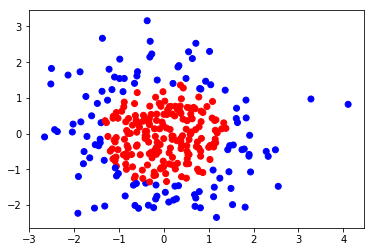

After 0 steps, loss is: 11.560059
After 2000 steps, loss is: 3.297647
After 4000 steps, loss is: 1.136564
After 6000 steps, loss is: 0.545523
After 8000 steps, loss is: 0.388688
After 10000 steps, loss is: 0.319933
After 12000 steps, loss is: 0.270398
After 14000 steps, loss is: 0.232292
After 16000 steps, loss is: 0.202775
After 18000 steps, loss is: 0.181041
After 20000 steps, loss is: 0.164795
After 22000 steps, loss is: 0.152706
After 24000 steps, loss is: 0.143503
After 26000 steps, loss is: 0.136132
After 28000 steps, loss is: 0.129337
After 30000 steps, loss is: 0.124817
After 32000 steps, loss is: 0.121103
After 34000 steps, loss is: 0.118046
After 36000 steps, loss is: 0.115041
After 38000 steps, loss is: 0.112500


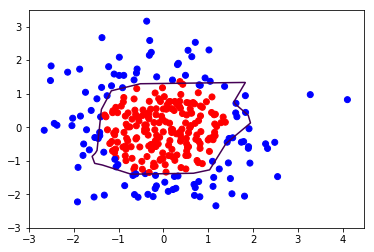

In [24]:
#coding:utf-8
#0导入模块 ，生成模拟数据集
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
BATCH_SIZE = 30 
seed = 2 
#基于seed产生随机数
rdm = np.random.RandomState(seed)
#随机数返回300行2列的矩阵，表示300组坐标点（x0,x1）作为输入数据集
X = rdm.randn(300,2)
#从X这个300行2列的矩阵中取出一行,判断如果两个坐标的平方和小于2，给Y赋值1，其余赋值0
#作为输入数据集的标签（正确答案）
Y_ = [int(x0*x0 + x1*x1 <2) for (x0,x1) in X]
#遍历Y中的每个元素，1赋值'red'其余赋值'blue'，这样可视化显示时人可以直观区分
Y_c = [['red' if y else 'blue'] for y in Y_]
#对数据集X和标签Y进行shape整理，第一个元素为-1表示，随第二个参数计算得到，第二个元素表示多少列，把X整理为n行2列，把Y整理为n行1列
X = np.vstack(X).reshape(-1,2)
Y_ = np.vstack(Y_).reshape(-1,1)
# print(X)
# print(Y_)
# print(Y_c)
#用plt.scatter画出数据集X各行中第0列元素和第1列元素的点即各行的（x0，x1），用各行Y_c对应的值表示颜色（c是color的缩写） 
plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c)) 
plt.show()


#定义神经网络的输入、参数和输出，定义前向传播过程 
def get_weight(shape, regularizer):
	w = tf.Variable(tf.random_normal(shape), dtype=tf.float32)
	tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(regularizer)(w))
	return w

def get_bias(shape):  
    b = tf.Variable(tf.constant(0.01, shape=shape)) 
    return b
	
x = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None, 1))

w1 = get_weight([2,11], 0.01)	
b1 = get_bias([11])
y1 = tf.nn.relu(tf.matmul(x, w1)+b1)

w2 = get_weight([11,1], 0.01)
b2 = get_bias([1])
y = tf.matmul(y1, w2)+b2 


#定义损失函数
loss_mse = tf.reduce_mean(tf.square(y-y_))
loss_total = loss_mse + tf.add_n(tf.get_collection('losses'))


#定义反向传播方法：包含正则化
train_step = tf.train.AdamOptimizer(0.0001).minimize(loss_total)

with tf.Session() as sess:
	init_op = tf.global_variables_initializer()
	sess.run(init_op)
    
	STEPS = 40000
	for i in range(STEPS):
		start = (i*BATCH_SIZE) % 300
		end = start + BATCH_SIZE
		sess.run(train_step, feed_dict={x: X[start:end], y_:Y_[start:end]})
		if i % 2000 == 0:
			loss_v = sess.run(loss_total, feed_dict={x:X,y_:Y_})
			print("After %d steps, loss is: %f" %(i, loss_v))

	xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
	grid = np.c_[xx.ravel(), yy.ravel()]
	probs = sess.run(y, feed_dict={x:grid})
	probs = probs.reshape(xx.shape)
# 	print "w1:\n",sess.run(w1)
# 	print "b1:\n",sess.run(b1)
# 	print "w2:\n",sess.run(w2)
# 	print "b2:\n",sess.run(b2)

plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y_c)) 
plt.contour(xx, yy, probs, levels=[.5])
plt.show()
